# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('rawdata_luftqualitaet.csv')

X = df[df.columns[:-1]].values
y = df['state_air_quality']

# Validation data to calculate the loss and accuracy in every epoch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Multiple classification
model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7732 - loss: 0.7435 - val_accuracy: 0.8478 - val_loss: 0.5215
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.4571 - val_accuracy: 0.8967 - val_loss: 0.3794
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.3476 - val_accuracy: 0.9076 - val_loss: 0.3036
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.2805 - val_accuracy: 0.9130 - val_loss: 0.2522
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2274 - val_accuracy: 0.9239 - val_loss: 0.2119
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.1943 - val_accuracy: 0.9457 - val_loss: 0.1838
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.1672 - val_accuracy: 0.9511 - val_loss: 0.1651
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9563 - loss: 0.1471 - val_accuracy: 0.9674 - v

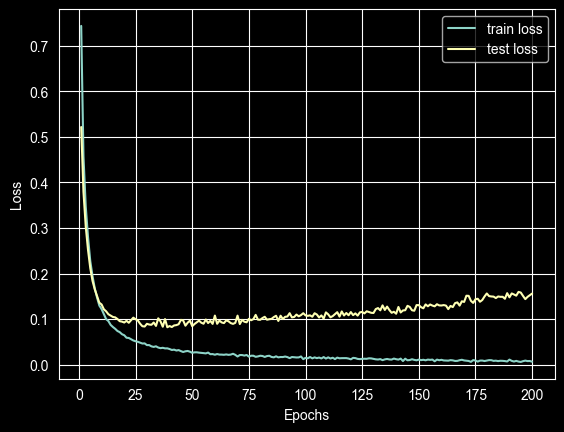

In [41]:
epochs = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs = range(1, len(accuracy_train)+1)

plt.plot(epochs, loss_train, label='train loss')
plt.plot(epochs, loss_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

In [42]:
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint)

stopping = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint(filepath='keras_test_model.h5', monitor='val_loss', save_best_only=True)

# Multiple classification
model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

Epoch 1/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.3750 - loss: 1.0665

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7842 - loss: 0.6779 - val_accuracy: 0.8207 - val_loss: 0.4944
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 0.6322

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.4361 - val_accuracy: 0.8750 - val_loss: 0.3800
Epoch 3/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 0.4089

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8852 - loss: 0.3386 - val_accuracy: 0.9022 - val_loss: 0.3044
Epoch 4/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8750 - loss: 0.3250

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9044 - loss: 0.2723 - val_accuracy: 0.9185 - val_loss: 0.2508
Epoch 5/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.2459

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9153 - loss: 0.2233 - val_accuracy: 0.9293 - val_loss: 0.2117
Epoch 6/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9062 - loss: 0.2678

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9372 - loss: 0.1876 - val_accuracy: 0.9402 - val_loss: 0.1828
Epoch 7/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.2415

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1622 - val_accuracy: 0.9457 - val_loss: 0.1659
Epoch 8/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0998

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1430 - val_accuracy: 0.9511 - val_loss: 0.1548
Epoch 9/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.1910

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1270 - val_accuracy: 0.9457 - val_loss: 0.1400
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.1159 - val_accuracy: 0.9348 - val_loss: 0.1425
Epoch 11/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 0.1243

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1079 - val_accuracy: 0.9457 - val_loss: 0.1293
Epoch 12/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.1730

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.0999 - val_accuracy: 0.9511 - val_loss: 0.1238
Epoch 13/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8438 - loss: 0.2064

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.0928 - val_accuracy: 0.9457 - val_loss: 0.1198
Epoch 14/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.0891

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9686 - loss: 0.0852 - val_accuracy: 0.9511 - val_loss: 0.1124
Epoch 15/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0803 - val_accuracy: 0.9457 - val_loss: 0.1146
Epoch 16/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9375 - loss: 0.1445

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.0780 - val_accuracy: 0.9457 - val_loss: 0.1078
Epoch 17/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0504

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.0723 - val_accuracy: 0.9620 - val_loss: 0.1055
Epoch 18/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0228

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.0684 - val_accuracy: 0.9511 - val_loss: 0.1030
Epoch 19/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0649 - val_accuracy: 0.9457 - val_loss: 0.1033
Epoch 20/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0358

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.0634 - val_accuracy: 0.9457 - val_loss: 0.1004
Epoch 21/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9375 - loss: 0.1450

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0620 - val_accuracy: 0.9620 - val_loss: 0.0962
Epoch 22/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.0957

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0594 - val_accuracy: 0.9674 - val_loss: 0.0940
Epoch 23/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0827

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0567 - val_accuracy: 0.9674 - val_loss: 0.0903
Epoch 24/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.0617

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0536 - val_accuracy: 0.9674 - val_loss: 0.0894
Epoch 25/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0536 - val_accuracy: 0.9565 - val_loss: 0.0968
Epoch 26/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0504 - val_accuracy: 0.9620 - val_loss: 0.0909
Epoch 27/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0492 - val_accuracy: 0.9620 - val_loss: 0.0900
Epoch 28/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0465 - val_accuracy: 0.9620 - val_loss: 0.0905
Epoch 29/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0469 - val_accuracy: 0.9620 - val_loss: 0.0910


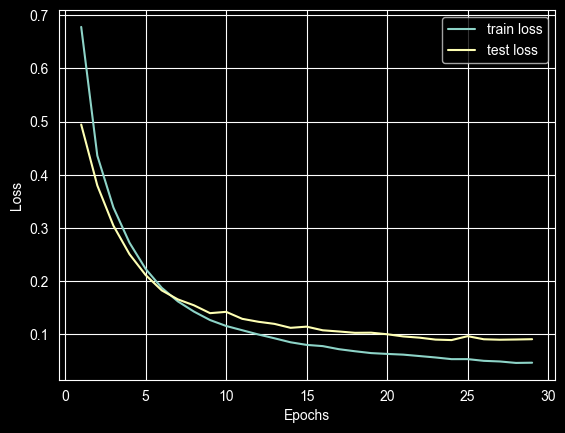

In [43]:
epochs = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=[stopping, checkpoint],verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs = range(1, len(accuracy_train)+1)

plt.plot(epochs, loss_train, label='train loss')
plt.plot(epochs, loss_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">